In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [8]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### check embalance

<AxesSubplot:>

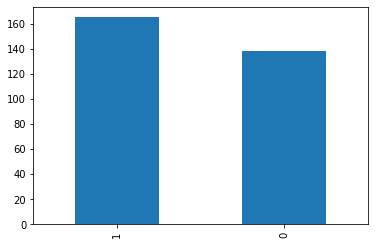

In [9]:

df['target'].value_counts().plot(kind = 'bar') 

In [10]:
from imblearn.over_sampling import SMOTE, ADASYN #, RandomOverSampler                                      # over Sambling

In [11]:
X = df.drop(columns=['target'])
y = df['target']

print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [12]:
X_resampled1, y_resampled1 = SMOTE().fit_resample(X, y)
X_resampled1.shape, y_resampled1.shape

((330, 13), (330,))

In [13]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [14]:
X_resampled2, y_resampled2 = NearMiss().fit_resample(X, y)
X_resampled2.shape, y_resampled2.shape

((276, 13), (276,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [18]:
print("confusion_matrix:\n", cf)
print("report:\n", cr)

confusion_matrix:
 [[20 10]
 [12 24]]
report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.65        30
           1       0.71      0.67      0.69        36

    accuracy                           0.67        66
   macro avg       0.67      0.67      0.67        66
weighted avg       0.67      0.67      0.67        66



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [21]:
print("confusion_matrix:\n", cf)
print("report:\n", cr)

confusion_matrix:
 [[15 11]
 [ 7 23]]
report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.62        26
           1       0.68      0.77      0.72        30

    accuracy                           0.68        56
   macro avg       0.68      0.67      0.67        56
weighted avg       0.68      0.68      0.68        56



In [22]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [23]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[18  8]
 [ 3 27]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.77      0.90      0.83        30

    accuracy                           0.80        56
   macro avg       0.81      0.80      0.80        56
weighted avg       0.81      0.80      0.80        56



In [25]:
model = make_pipeline(StandardScaler(),KNeighborsClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [26]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[19  7]
 [ 2 28]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.80      0.93      0.86        30

    accuracy                           0.84        56
   macro avg       0.85      0.83      0.84        56
weighted avg       0.85      0.84      0.84        56



In [ ]:
#https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv